Prepared By [Izam Mohammed](https://github.com/izam-mohammed) 😊. Follow for more ❤️.

In [28]:
!pip install tqdm --quiet

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [30]:
# setting the transform

transform = transforms.Compose(
    [transforms.ToTensor(),   # transforms to pytroch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5,0.5)),
     ]
)
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [31]:
# getting and transforming the data

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root = "./data",
    train = True,
    download = True,
    transform = transform,
)

trainset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [32]:
# loading the data using torch data loader

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle = True,
    num_workers = 2,
)
trainloader

In [33]:
# setting up the data for testing as well

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform,
    )

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2)

testloader

Files already downloaded and verified


In [34]:
# defining the classes

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

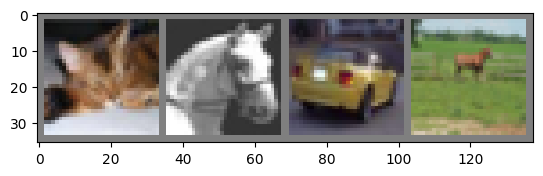

cat  	 horse	 car  	 horse	


In [35]:
# showing some of the images

def imshow(img):
  img = img / 2 + 0.5    # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}\t' for j in range(batch_size)))

In [36]:
# getting the model building contractors

import torch.nn as nn
import torch.nn.functional as F

In [51]:
# defining the cnn

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = Net()

In [52]:
# optimizing

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0001)

In [53]:
len(trainloader)

12500

In [54]:
# training

for epoch in range(10):
  running_loss = 0.0
  for i, data in tqdm(enumerate(trainloader, 0), desc = f"epoch - {epoch+1}"):
    inputs, labels = data
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'loss: {running_loss / len(trainloader):.3f}')

print("Finished training")

epoch - 1: 12500it [01:49, 113.78it/s]

loss: 1.730



epoch - 2: 12500it [01:53, 110.43it/s]

loss: 1.486



epoch - 3: 12500it [01:49, 113.66it/s]

loss: 1.385



epoch - 4: 12500it [01:50, 113.53it/s]

loss: 1.311



epoch - 5: 12500it [01:49, 114.29it/s]

loss: 1.251



epoch - 6: 12500it [01:51, 111.72it/s]

loss: 1.199



epoch - 7: 12500it [01:53, 109.71it/s]


loss: 1.156


epoch - 8: 12500it [01:53, 110.38it/s]

loss: 1.116



epoch - 9: 12500it [01:53, 110.54it/s]

loss: 1.080



epoch - 10: 12500it [01:52, 111.53it/s]

loss: 1.048
Finished training


In [55]:
# saving the model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

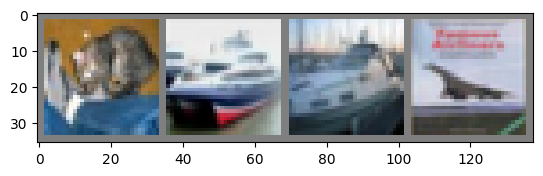

ground truth:  cat  	 ship 	 ship 	 plane	


In [56]:
# testing the network

dataiter = iter(testloader)
images, labels = next(dataiter)

# printing the images
imshow(torchvision.utils.make_grid(images))
print("ground truth: ", " ".join(f"{classes[labels[j]]:5s}\t" for j in range(4)))

In [57]:
# loading the data

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [58]:
# predicting

outputs = net(images)

In [59]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}\t'
                              for j in range(4)))

Predicted:  cat  	 ship 	 ship 	 ship 	


In [60]:
# what is the accuracy of this

correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)

    correct += (predicted == labels).sum().item()


print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


That's ittt, thanks a lot